# Line Detection Model with Yolov8

Dataset used:
https://universe.roboflow.com/hakujou/station-platform-and-detecting-braille-blocks-2/browse?queryText=&pageSize=200&startingIndex=0&browseQuery=true

### Install Libraries

In [ ]:
!pip install roboflow

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 43.8 MB/s eta 0:00:00


### Read the Dataset from Roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="E5YM4g42KFfue13hvDuU")
project = rf.workspace("hakujou").project("station-platform-and-detecting-braille-blocks-2")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to station-platform-and-detecting-braille-blocks-2-1 in yolov8:: 100%|██████████| 2708/2708 [00:00<00:00, 4861.51it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Import Libraries

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator
import cv2
from IPython.display import clear_output


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Yolo Model

In [ ]:
model = YOLO('yolov8s.pt')  # Load a pretrained YOLOv8s model
results = model.train(data=dataset.location + "/data.yaml", epochs= 30, imgsz=640)

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/station-platform-and-detecting-braille-blocks-2-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /content/station-platform-and-detecting-braille-blocks-2-1/train/labels.cache... 1188 images, 66 backgrounds, 0 corrupt: 100%|██████████| 1188/1188 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/station-platform-and-detecting-braille-blocks-2-1/train/images/S__30949408_jpg.rf.0322fc691547249d0a7217c9a410edac.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/station-platform-and-detecting-braille-blocks-2-1/train/images/S__30949408_jpg.rf.46707e96ddb6ec8658f52dad0446d41b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/station-platform-and-detecting-braille-blocks-2-1/train/images/S__30949408_jpg.rf.536d8042620f5e3547c3cd0244ee76c1.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/station-platform-and-detecting-braille-blocks-2-1/valid/labels.cache... 112 images, 4 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.23G     0.8277      2.562      1.274         21        640: 100%|██████████| 75/75 [00:33<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all        112        256      0.677     0.0693      0.258      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.19G     0.8258       1.66      1.266         10        640: 100%|██████████| 75/75 [00:30<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


                   all        112        256      0.257      0.273      0.253      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.19G     0.8539      1.541      1.287         31        640: 100%|██████████| 75/75 [00:26<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        112        256      0.253      0.267      0.219      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.17G     0.8406      1.398      1.272         27        640: 100%|██████████| 75/75 [00:28<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        112        256      0.493      0.472      0.401      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.19G     0.7924      1.244      1.242         23        640: 100%|██████████| 75/75 [00:28<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        112        256      0.546      0.474      0.444      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.04G     0.7511      1.178      1.215         18        640: 100%|██████████| 75/75 [00:26<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        112        256      0.447      0.459      0.406       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.03G     0.7094      1.074      1.185         24        640: 100%|██████████| 75/75 [00:29<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        112        256      0.685      0.441       0.49      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.16G     0.6999      1.034      1.186         13        640: 100%|██████████| 75/75 [00:25<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        112        256      0.684      0.432      0.464      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.22G     0.6813     0.9803      1.169         15        640: 100%|██████████| 75/75 [00:26<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        112        256      0.502      0.466      0.451      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.17G     0.6506     0.8972      1.161         16        640: 100%|██████████| 75/75 [00:29<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        112        256      0.591      0.547       0.54      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.02G     0.6387     0.8734      1.137         30        640: 100%|██████████| 75/75 [00:26<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        112        256      0.586      0.469      0.501      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.18G     0.6098     0.8404      1.119         20        640: 100%|██████████| 75/75 [00:28<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        112        256      0.551      0.554      0.514      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.19G      0.587     0.7957      1.113         24        640: 100%|██████████| 75/75 [00:29<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


                   all        112        256      0.596      0.538      0.544      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.18G     0.5713     0.7619      1.096         17        640: 100%|██████████| 75/75 [00:26<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        112        256      0.691      0.535      0.611       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.19G     0.5649     0.7356      1.086         31        640: 100%|██████████| 75/75 [00:28<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        112        256      0.594      0.555      0.567      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.22G     0.5623       0.74      1.087         21        640: 100%|██████████| 75/75 [00:27<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        112        256      0.655      0.544      0.593      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.18G     0.5388     0.6664      1.071         20        640: 100%|██████████| 75/75 [00:26<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        112        256      0.696      0.598       0.61      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.01G     0.5357     0.6547      1.071         17        640: 100%|██████████| 75/75 [00:29<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        112        256      0.735      0.594      0.642      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.18G     0.5134     0.6284      1.055         21        640: 100%|██████████| 75/75 [00:34<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        112        256      0.759      0.556      0.623      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.18G     0.5093     0.6237      1.049         22        640: 100%|██████████| 75/75 [00:28<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        112        256      0.744      0.595      0.627       0.49


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.17G     0.6731     0.9039      1.184         10        640: 100%|██████████| 75/75 [00:26<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        112        256       0.82      0.572      0.626      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.14G     0.6233     0.7718      1.139          8        640: 100%|██████████| 75/75 [00:28<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        112        256      0.719      0.607      0.643      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.16G     0.6132      0.738      1.131         13        640: 100%|██████████| 75/75 [00:24<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        112        256      0.768      0.564      0.646      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.15G     0.5874      0.694      1.107         15        640: 100%|██████████| 75/75 [00:27<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        112        256      0.649      0.618       0.62      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         4G     0.5492     0.6588      1.086          4        640: 100%|██████████| 75/75 [00:25<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        112        256      0.802      0.602      0.658       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       4.3G     0.5507     0.6511      1.085          6        640: 100%|██████████| 75/75 [00:27<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        112        256      0.781       0.62      0.652      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         4G     0.5234     0.6306      1.068          5        640: 100%|██████████| 75/75 [00:25<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        112        256      0.827      0.594      0.641      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       4.2G     0.5193     0.5968      1.066          6        640: 100%|██████████| 75/75 [00:27<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all        112        256      0.772      0.618      0.617      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         4G     0.4913     0.5777      1.052         14        640: 100%|██████████| 75/75 [00:24<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        112        256      0.798      0.605       0.63      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.04G     0.4797     0.5753      1.035          9        640: 100%|██████████| 75/75 [00:26<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        112        256      0.774       0.62      0.644       0.53



30 epochs completed in 0.255 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 19.9MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 19.9MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,212 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all        112        256      0.798      0.602      0.658      0.539
         Railway track         53         53      0.907      0.774      0.852      0.678
        braille-blocks         11         22      0.508      0.273      0.291      0.216
              platform         88         91      0.971      0.738      0.871      0.761
    stopbraille-blocks         65         90      0.807      0.622      0.618        0.5
Speed: 0.3ms preprocess, 6.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train7


### Evaluate Results on test dataset

In [ ]:
test_data_path = dataset.location + "/test/images"

In [ ]:
results = model.predict(source=test_data_path, save=True, project='runs/detect', name='test_predictions')


image 1/48 /content/station-platform-and-detecting-braille-blocks-2-1/test/images/0752ba4341a3d3f047c2b7c0e21838b6_t_jpeg.rf.17ef251e6944f87d8c80b457f10e6db8.jpg: 640x640 6 stopbraille-blockss, 15.2ms
image 2/48 /content/station-platform-and-detecting-braille-blocks-2-1/test/images/0752ba4341a3d3f047c2b7c0e21838b6_t_jpeg.rf.5cdf35fa074659138c66fe0c2ee37742.jpg: 640x640 5 stopbraille-blockss, 15.2ms
image 3/48 /content/station-platform-and-detecting-braille-blocks-2-1/test/images/0752ba4341a3d3f047c2b7c0e21838b6_t_jpeg.rf.7412854109063bf6ff3d2dfbc640191e.jpg: 640x640 3 stopbraille-blockss, 15.2ms
image 4/48 /content/station-platform-and-detecting-braille-blocks-2-1/test/images/0752ba4341a3d3f047c2b7c0e21838b6_t_jpeg.rf.a1f464e55dc82026eb2a3ffefc5b8ece.jpg: 640x640 4 stopbraille-blockss, 15.2ms
image 5/48 /content/station-platform-and-detecting-braille-blocks-2-1/test/images/19b7c12f8a8f4a82d38c0736e23de362_t_jpeg.rf.3cb388f46154c2f7ae7920914c86920d.jpg: 640x640 1 Railway track, 1 platf

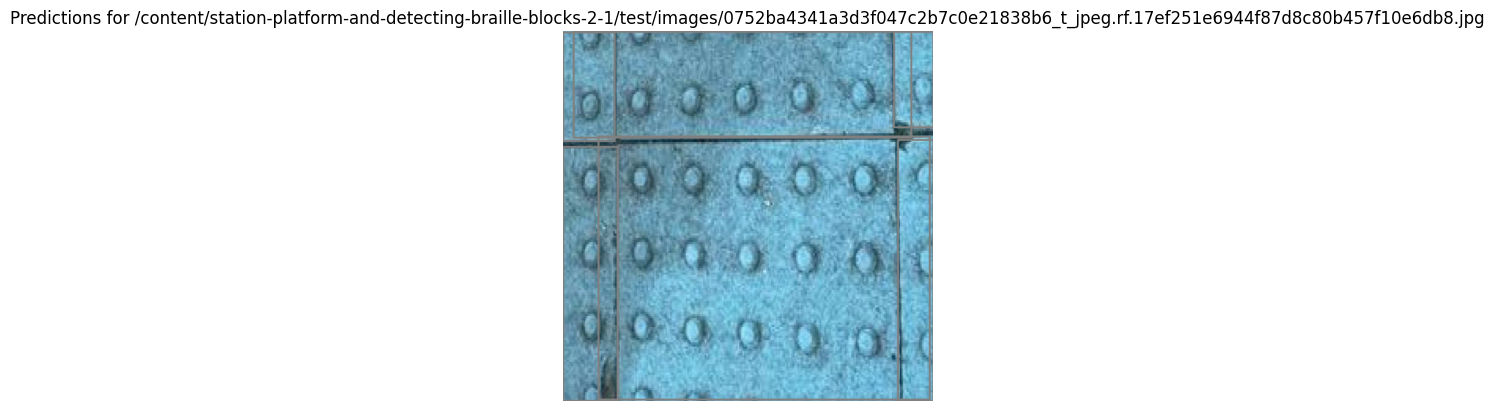

In [ ]:
# Assuming 'results' is the output from model.predict call
for r in results:
    # Get the image and its path
    im = r.orig_img
    im_path = r.path

    # Create an Annotator object
    annotator = Annotator(im)

    # Get bounding boxes and labels
    boxes = r.boxes.xyxy
    # classes = r.boxes.cls
    # conf = r.boxes.conf

    # Plot bounding boxes on the image
    # If you have class names, use model.names to map class IDs to names
    # annotator.box_label(b, model.names[int(c)])
    for box in boxes:
        annotator.box_label(box)

    # Display the annotated image
    plt.imshow(annotator.result())
    plt.title(f"Predictions for {im_path}")
    plt.axis('off')  # Hide axis ticks
    plt.show()

### Check Results on a frame







image 1/1 /content/9614039-uhd_2160_3840_24fps_mp4-0006_jpg.rf.3c584ee1f25ba3ff2d53067e78f71708.jpg: 640x384 1 platform, 447.0ms
Speed: 3.5ms preprocess, 447.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


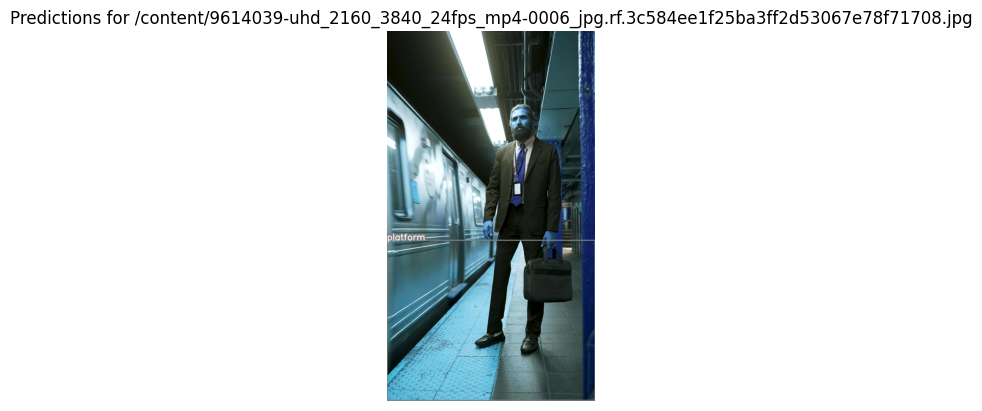

In [ ]:
# Load the model
model_path = '/content/Line_detection_weights (best).pt'  # Path to trained model weights
model = YOLO(model_path)

# Set the path to test image
image_path = '/content/9614039-uhd_2160_3840_24fps_mp4-0006_jpg.rf.3c584ee1f25ba3ff2d53067e78f71708.jpg'
# Run inference on the image
results = model.predict(source=image_path, save=False)

# Display the annotated image
for r in results:
    im = r.orig_img
    annotator = Annotator(im)
    boxes = r.boxes.xyxy
    classes = r.boxes.cls  # Get class IDs
    for box, cls in zip(boxes, classes):
        annotator.box_label(box, model.names[int(cls)])  # Include class name
    plt.imshow(annotator.result())
    plt.title(f"Predictions for {image_path}")
    plt.axis('off')
    plt.show()

### Inference on Video

In [ ]:
# Load the model
model_path = '/content/runs/detect/train6/weights/best.pt'  # Path to trained model weights
model = YOLO(model_path)

# Path to video file
video_path = '/content/drive/MyDrive/DEPI GP - Metro Safety System/Videos/Test video/9614039-uhd_2160_3840_24fps.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == True:
        # Perform inference
        results = model(frame)

        # Plot the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame in the notebook
        plt.imshow(annotated_frame)
        plt.title("Inference Results")
        plt.axis('off')
        plt.show()
        clear_output(wait=True)  # Clear previous frame's output

    else:
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()